<div style="text-align: right"> Danial Ludwig </div>
<div style="text-align: right"> University of Maryland, College Park</div>

# Visually evaluating the trained neural network

Side-by-side comparisons of original and output images, drawing on the training/test data as well as cropped versions of the numerical and fashion MNIST data.

------------------------------------------------------

### Load data and trained model

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
np.set_printoptions(precision=4, suppress=True)

In [24]:
# data generated by make_data script
with np.load('nn-inverse-data.npz') as data:
    x_train = data['x_train']
    x_test = data['x_test']
    y_train = data['y_train']
    y_test = data['y_test']
    A = data['A']
    
# models trained in train_*_network scripts
model = tf.keras.models.load_model('model')

# numerical and fashion MNIST datasets (forget about the labels and test data)
(number_imgs,_), (_,_) = tf.keras.datasets.mnist.load_data()
(fashion_imgs,_), (_,_) = tf.keras.datasets.fashion_mnist.load_data()
number_imgs = number_imgs / 255.
fashion_imgs = fashion_imgs / 255.

### Image comparison helper function

In [16]:
def plot_img_comparison(mat0, mat1, scale_to_01=False, left_title='', right_title=''):
    '''
    Plot two matrices as images, side-by-side.
    
    If scale_to_01=False, (min(both images), max(both images)) -> (black, white)
    If scale_to_01=True, (0,1) -> (black, white)
    '''
    fig, axs = plt.subplots(1, 2, figsize=(9, 4), constrained_layout=True)
    axs[0].set_title(left_title)    
    axs[1].set_title(right_title)
    axs[0].axis('off')
    axs[1].axis('off')
    
    # if the domain of the images is within [0,1], then 0 -> black, 1 -> white
    if scale_to_01:
        im0 = axs[0].imshow(mat0, cmap='gray', vmin=0, vmax=1)
        im1 = axs[1].imshow(mat1, cmap='gray', vmin=0, vmax=1)

        # set colorbar in-between images
        fig.colorbar(im0, ax=axs[0])

    # shared scale of overall_min -> black, overall_max -> white
    else:
        overall_min = np.min([np.min(mat0),np.min(mat1)])
        overall_max = np.max([np.max(mat0),np.max(mat1)])
        
        im0 = axs[0].imshow(mat0, cmap='gray', vmin=overall_min, vmax=overall_max)
        im1 = axs[1].imshow(mat1, cmap='gray', vmin=overall_min, vmax=overall_max)

        fig.colorbar(im0, ax=axs[0])
    plt.show()

### Training data

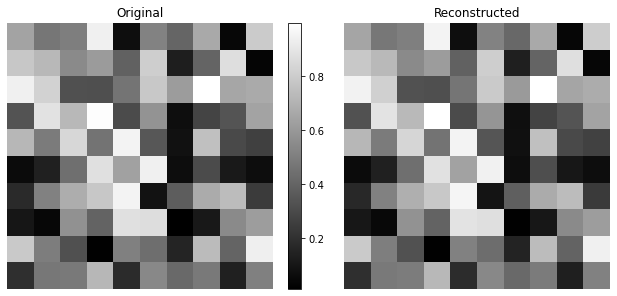

In [17]:
# grab vector in the original training data y_train
# and corresponding vector in encoded data x_train
idx = 0 # vary this to look at diff images

nn_output = model(x_train[idx:idx+1])
orig_img = np.reshape(y_train[idx], (10,10))
recon_img = np.reshape(nn_output, (10,10))

plot_img_comparison(orig_img, recon_img,
                    left_title='Original', right_title='Reconstructed')

### Test data

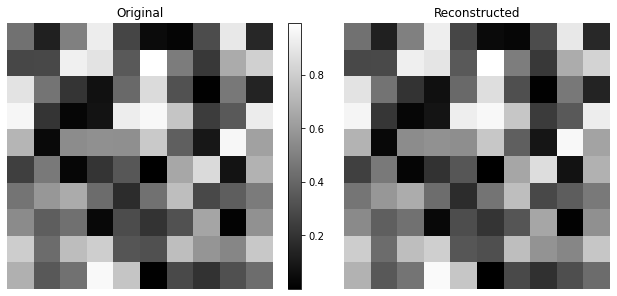

In [18]:
# grab vector in the original training data y_train
# and corresponding vector in encoded data x_train
idx = 0 # vary this to look at diff images

nn_output = model(x_test[idx:idx+1])
orig_img = np.reshape(y_test[idx], (10,10))
recon_img = np.reshape(nn_output, (10,10))

plot_img_comparison(orig_img, recon_img,
                    left_title='Original', right_title='Reconstructed')

### Numerical MNIST

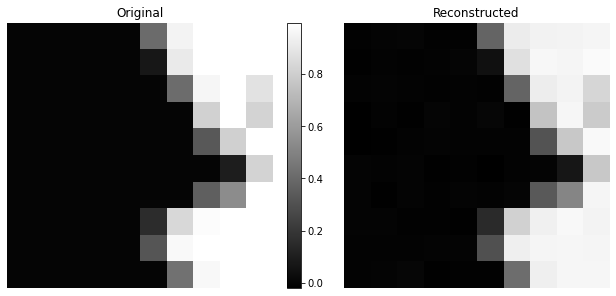

In [25]:
idx = 10 # vary this to look at diff images

# crop a 10x10 section of this image with
# first row i and first column j
i = 5; j = 5
orig_img = number_imgs[idx:idx+1, i:i+10, j:j+10]

# flatten, encode with A, then run through network
x_in = np.reshape(orig_img, (1, 100)) @ A
nn_output = model(x_in)

# reshape network output to plot
recon_img = np.reshape(nn_output, (10,10))

# plot original and reconstructed images side-by-side
plot_img_comparison(orig_img[0], recon_img,
                    left_title='Original', right_title='Reconstructed')

### Fashion MNIST

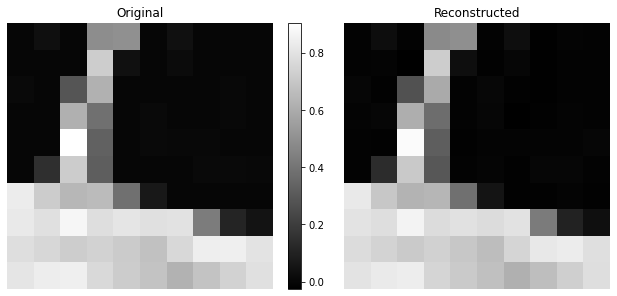

In [26]:
idx = 100 # vary this to look at diff images

# crop a 10x10 section of this image with
# first row i and first column j
i = 5; j = 5
orig_img = fashion_imgs[idx:idx+1, i:i+10, j:j+10]

# flatten, encode with A, then run through network
x_in = np.reshape(orig_img, (1, 100)) @ A
nn_output = model(x_in)

# reshape network output to plot
recon_img = np.reshape(nn_output, (10,10))

# plot original and reconstructed images side-by-side
plot_img_comparison(orig_img[0], recon_img,
                    left_title='Original', right_title='Reconstructed')

## Next steps

1. Analyze the weights of this mostly-sigmoid linear output model. See if the training converged to a solution that basically ignores the sigmoid neurons and somehow contains the pseudo-inverse in the last layer (which basically acts like a 5000x100 matrix)?
2. Try a fully ReLU network. Previously we were looking at a ReLU network with a linear output layer and it didn't have $J\rightarrow A^+$ during the training, but making it all ReLU might give something interesting.